### Our needed libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### and our dataset.

In [2]:
data=pd.read_csv("Sales.csv")
df=data.copy()
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date              113036 non-null  object 
 1   Day               113036 non-null  int64  
 2   Month             113036 non-null  object 
 3   Year              113036 non-null  int64  
 4   Customer_Age      113036 non-null  int64  
 5   Age_Group         113022 non-null  object 
 6   Customer_Gender   113036 non-null  object 
 7   Country           113036 non-null  object 
 8   State             113036 non-null  object 
 9   Product_Category  113036 non-null  object 
 10  Sub_Category      113036 non-null  object 
 11  Product           113036 non-null  object 
 12  Order_Quantity    113011 non-null  float64
 13  Unit_Cost         113006 non-null  float64
 14  Unit_Price        113016 non-null  float64
 15  Profit            113015 non-null  float64
 16  Cost              11

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,11/26/2013,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0
1,11/26/2015,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0
2,3/23/2014,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23.0,45.0,120.0,1366.0,1035.0,2401.0
3,3/23/2016,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20.0,45.0,120.0,1188.0,900.0,2088.0
4,5/15/2014,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4.0,45.0,120.0,238.0,180.0,418.0


In [3]:
df.shape

(113036, 18)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Day,113036.0,15.665753,8.781567,1.0,8.0,16.0,23.0,31.0
Year,113036.0,2014.401739,1.272510,2011.0,2013.0,2014.0,2016.0,2016.0
Customer_Age,113036.0,35.919212,11.021936,17.0,28.0,35.0,43.0,87.0
Order_Quantity,113011.0,11.902363,9.562317,1.0,2.0,10.0,20.0,32.0
Unit_Cost,113006.0,267.355379,549.896531,1.0,2.0,9.0,42.0,2171.0
Unit_Price,113016.0,452.997346,922.142166,2.0,5.0,24.0,70.0,3578.0
Profit,113015.0,284.965075,453.828318,-30.0,29.0,101.0,358.0,15096.0
Cost,113015.0,469.315117,884.935991,1.0,28.0,108.0,432.0,42978.0
Revenue,113017.0,754.294734,1309.146865,2.0,63.0,222.0,800.0,58074.0


### Info function generates too much inferences. Shows inappropriate dtypes, null values, rows and columns.
#### Seems like there is no inappropriate dtypes but some columns has null values and day, month and year columns shouldn't be integer or float dtype.
#### Also we can change Date column's dtype to date_time.

In [5]:
df["Day"]=df["Day"].astype("object")
df["Year"]=df["Year"].astype("object")
df["Date"]=pd.to_datetime(df["Date"])

In [6]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  object        
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  object        
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113022 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113011 non-null  float64       
 13  Unit_Cost         113006 non-null  float64       
 14  Unit

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23.0,45.0,120.0,1366.0,1035.0,2401.0
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20.0,45.0,120.0,1188.0,900.0,2088.0
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4.0,45.0,120.0,238.0,180.0,418.0


### Let's first deal with null or nan values.

In [7]:
df.isnull().sum()

Date                 0
Day                  0
Month                0
Year                 0
Customer_Age         0
Age_Group           14
Customer_Gender      0
Country              0
State                0
Product_Category     0
Sub_Category         0
Product              0
Order_Quantity      25
Unit_Cost           30
Unit_Price          20
Profit              21
Cost                21
Revenue             19
dtype: int64

### If you have null or nan values you can drop them, fill them with mean-median-mode or with EM, KNN and Random Forests algorithm etc.. But first you should check your null values and try to understand your variable. Let's check and try to understand our first null column which it is Age_Group.

In [8]:
df["Age_Group"].unique()

array(['Youth (<25)', 'Adults (35-64)', 'Young Adults (25-34)', nan,
       'Seniors (64+)'], dtype=object)

### As you see, Age_Group are defined by customers age. So if our customer's age 23 then she/he is at youth category. We can fill our null values like that. Now we don't need an algorithm or median, mode, mean also we don't need to drop this values. We got this inferance by checking column.

### Here this row is for null Age_Group values. Cause I need their index for verify.

In [9]:
df[pd.isnull(df["Age_Group"])]

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
13,2015-07-15,15,July,2015,34,NaN,M,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,7.0,45.0,120.0,349.0,315.0,664.0
30,2014-03-13,13,March,2014,48,NaN,F,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,20.0,45.0,120.0,1476.0,900.0,2376.0
49,2015-08-07,7,August,2015,38,NaN,M,Germany,Saarland,Accessories,Bike Racks,Hitch Rack - 4-Bike,1.0,45.0,120.0,53.0,45.0,98.0
83,2016-03-26,26,March,2016,47,NaN,F,United States,California,Accessories,Bike Racks,Hitch Rack - 4-Bike,4.0,45.0,120.0,290.0,180.0,470.0
99,2015-10-25,25,October,2015,32,NaN,M,United States,California,Accessories,Bike Racks,Hitch Rack - 4-Bike,9.0,45.0,120.0,653.0,405.0,1058.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,2014-03-02,2,March,2014,41,NaN,F,United States,California,Accessories,Bike Racks,Hitch Rack - 4-Bike,3.0,45.0,120.0,218.0,135.0,353.0
292,2013-11-15,15,November,2013,30,NaN,M,United States,California,Accessories,Bike Racks,Hitch Rack - 4-Bike,5.0,45.0,120.0,363.0,225.0,588.0
336,2013-09-06,6,September,2013,45,NaN,F,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,11.0,45.0,120.0,812.0,495.0,1307.0
356,2014-05-09,9,May,2014,48,NaN,F,United States,California,Accessories,Bike Racks,Hitch Rack - 4-Bike,5.0,45.0,120.0,363.0,225.0,588.0


### I used a for loop :)

In [10]:
age_group_filler=[]
for i in df["Customer_Age"]:
    if i < 25:
        age_group_filler.append("Youth (<25)")
    elif i in np.arange(25,35) :
        age_group_filler.append("Young Adults (25-34)")
    elif i in np.arange(35,65) :
        age_group_filler.append("Adults (35-64)")
    elif i >=65:
        age_group_filler.append("Seniors (64+)")
df["age_group_filler"]=age_group_filler
df["Age_Group"]=df["Age_Group"].fillna(df["age_group_filler"])
df.drop("age_group_filler",axis=1,inplace=True)
df["Age_Group"].isnull().sum()

0

### We filled nan and null values. Let's check them if our for loop works well.

In [11]:
print("13. Index Value:\n{}\n***************************************\n356. Index Value:\n{}".format(df.iloc[13]
                                                                                                    ,df.iloc[356]))

13. Index Value:
Date                 2015-07-15 00:00:00
Day                                   15
Month                               July
Year                                2015
Customer_Age                          34
Age_Group           Young Adults (25-34)
Customer_Gender                        M
Country                        Australia
State                           Victoria
Product_Category             Accessories
Sub_Category                  Bike Racks
Product              Hitch Rack - 4-Bike
Order_Quantity                         7
Unit_Cost                             45
Unit_Price                           120
Profit                               349
Cost                                 315
Revenue                              664
Name: 13, dtype: object
***************************************
356. Index Value:
Date                2014-05-09 00:00:00
Day                                   9
Month                               May
Year                               2014
Cus

### Before we go we should know our dataset's story, purpose and background. If we know our dataset we can fill drop or replace our variables. Now we are just 'assuming'. If we all clear let's continue.

### Looks like it worked well for Age_Group column. 

### Let's check other columns and check inside the our next null-nan column. Order_Quantity.

In [12]:
df[pd.isnull(df["Order_Quantity"])]

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
8,2014-02-22,22,February,2014,35,Adults (35-64),M,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,45.0,120.0,NaN,NaN,NaN
42,2013-08-28,28,August,2013,61,Adults (35-64),M,United States,California,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,NaN,NaN,581.0,360.0,941.0
43,2015-08-28,28,August,2015,61,Adults (35-64),M,United States,California,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,45.0,120.0,726.0,450.0,1176.0
44,2013-08-27,27,August,2013,57,Adults (35-64),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,45.0,120.0,148.0,NaN,238.0
45,2015-08-27,27,August,2015,57,Adults (35-64),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,45.0,120.0,74.0,45.0,119.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,2013-07-31,31,July,2013,29,Young Adults (25-34),F,United States,California,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,NaN,NaN,NaN,NaN,NaN
169,2015-07-31,31,July,2015,29,Young Adults (25-34),F,United States,California,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,NaN,NaN,NaN,NaN,NaN
170,2013-08-03,3,August,2013,29,Young Adults (25-34),F,United States,California,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,NaN,NaN,NaN,NaN,NaN
171,2015-08-03,3,August,2015,29,Young Adults (25-34),F,United States,California,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
pd.isnull(df["Order_Quantity"]).sum()

25

### We can fill our some nans with a formula. If we divide Cost to Unit_Cost, we can fill our Order_Quantity.

##### df["Order_Quantity"]=df["Cost"]/df["Unit_Cost"]

In [14]:
df["Order_Quantity"].fillna(df["Cost"]/df["Unit_Cost"],inplace=True)
print("43. Index Value:\n{}\n***************************************\n45. Index Value:\n{}".format(df.iloc[43]
                                                                                                    ,df.iloc[45]))

43. Index Value:
Date                2015-08-28 00:00:00
Day                                  28
Month                            August
Year                               2015
Customer_Age                         61
Age_Group                Adults (35-64)
Customer_Gender                       M
Country                   United States
State                        California
Product_Category            Accessories
Sub_Category                 Bike Racks
Product             Hitch Rack - 4-Bike
Order_Quantity                       10
Unit_Cost                            45
Unit_Price                          120
Profit                              726
Cost                                450
Revenue                            1176
Name: 43, dtype: object
***************************************
45. Index Value:
Date                2015-08-27 00:00:00
Day                                  27
Month                            August
Year                               2015
Customer_Age          

### It worked for a few values but others has also nans at Cost, Unit_Cost columns. So they had to drop. But if we drop Order_Quantity's nans if affects other variables. So before drop we should check if we can fill or not.

In [15]:
# Looks like we filled 2 values :) It's worth ^^
pd.isnull(df["Order_Quantity"]).sum()

23

In [16]:
df[pd.isnull(df["Order_Quantity"])]

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
8,2014-02-22,22,February,2014,35,Adults (35-64),M,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,45.0,120.0,NaN,NaN,NaN
42,2013-08-28,28,August,2013,61,Adults (35-64),M,United States,California,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,NaN,NaN,581.0,360.0,941.0
44,2013-08-27,27,August,2013,57,Adults (35-64),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,45.0,120.0,148.0,NaN,238.0
46,2013-11-17,17,November,2013,29,Young Adults (25-34),F,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,NaN,120.0,NaN,540.0,1426.0
67,2015-08-03,3,August,2015,35,Adults (35-64),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,NaN,120.0,74.0,45.0,119.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,2013-07-31,31,July,2013,29,Young Adults (25-34),F,United States,California,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,NaN,NaN,NaN,NaN,NaN
169,2015-07-31,31,July,2015,29,Young Adults (25-34),F,United States,California,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,NaN,NaN,NaN,NaN,NaN
170,2013-08-03,3,August,2013,29,Young Adults (25-34),F,United States,California,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,NaN,NaN,NaN,NaN,NaN
171,2015-08-03,3,August,2015,29,Young Adults (25-34),F,United States,California,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,NaN,NaN,NaN,NaN,NaN


### We handled Order_Quantity too. Let's jump for another one :) Unit_Cost

In [17]:
df[pd.isnull(df["Unit_Cost"])]

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
41,2016-03-31,31,March,2016,43,Adults (35-64),F,United States,California,Accessories,Bike Racks,Hitch Rack - 4-Bike,11.0,NaN,120.0,799.0,495.0,1294.0
42,2013-08-28,28,August,2013,61,Adults (35-64),M,United States,California,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,NaN,NaN,581.0,360.0,941.0
46,2013-11-17,17,November,2013,29,Young Adults (25-34),F,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,NaN,120.0,NaN,540.0,1426.0
67,2015-08-03,3,August,2015,35,Adults (35-64),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,NaN,120.0,74.0,45.0,119.0
68,2014-06-19,19,June,2014,35,Adults (35-64),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,NaN,120.0,738.0,450.0,1188.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,2013-12-23,23,December,2013,26,Young Adults (25-34),M,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,6.0,NaN,NaN,NaN,NaN,NaN
201,2015-12-23,23,December,2015,26,Young Adults (25-34),M,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,7.0,NaN,NaN,NaN,NaN,NaN
202,2014-07-31,31,July,2014,23,Youth (<25),M,Germany,Saarland,Accessories,Bike Racks,Hitch Rack - 4-Bike,26.0,NaN,NaN,NaN,NaN,NaN
203,2016-07-31,31,July,2016,23,Youth (<25),M,Germany,Saarland,Accessories,Bike Racks,Hitch Rack - 4-Bike,23.0,NaN,NaN,NaN,NaN,NaN


### Here is our first value can fill by Cost/Order_Quantity.

In [18]:
df["Unit_Cost"].fillna(df["Cost"]/df["Order_Quantity"],inplace=True)
print("41. Index Value:\n{}".format(df.loc[41]))

41. Index Value:
Date                2016-03-31 00:00:00
Day                                  31
Month                             March
Year                               2016
Customer_Age                         43
Age_Group                Adults (35-64)
Customer_Gender                       F
Country                   United States
State                        California
Product_Category            Accessories
Sub_Category                 Bike Racks
Product             Hitch Rack - 4-Bike
Order_Quantity                       11
Unit_Cost                            45
Unit_Price                          120
Profit                              799
Cost                                495
Revenue                            1294
Name: 41, dtype: object


### Let's check our how much value we filled for Unit_Cost.

In [19]:
# Looks like we filled 1 value :)
pd.isnull(df["Unit_Cost"]).sum()

29

### There is just 1 value filled. We should drop nans right now but like we said if we drop Unit_Cost's nans it will affect other variables. So we will move on.

In [20]:
df[pd.isnull(df["Unit_Cost"])]

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
42,2013-08-28,28,August,2013,61,Adults (35-64),M,United States,California,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,NaN,NaN,581.0,360.0,941.0
46,2013-11-17,17,November,2013,29,Young Adults (25-34),F,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,NaN,120.0,NaN,540.0,1426.0
67,2015-08-03,3,August,2015,35,Adults (35-64),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,NaN,120.0,74.0,45.0,119.0
68,2014-06-19,19,June,2014,35,Adults (35-64),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,NaN,120.0,738.0,450.0,1188.0
69,2016-06-19,19,June,2016,35,Adults (35-64),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,NaN,120.0,886.0,540.0,1426.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,2013-12-23,23,December,2013,26,Young Adults (25-34),M,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,6.0,NaN,NaN,NaN,NaN,NaN
201,2015-12-23,23,December,2015,26,Young Adults (25-34),M,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,7.0,NaN,NaN,NaN,NaN,NaN
202,2014-07-31,31,July,2014,23,Youth (<25),M,Germany,Saarland,Accessories,Bike Racks,Hitch Rack - 4-Bike,26.0,NaN,NaN,NaN,NaN,NaN
203,2016-07-31,31,July,2016,23,Youth (<25),M,Germany,Saarland,Accessories,Bike Racks,Hitch Rack - 4-Bike,23.0,NaN,NaN,NaN,NaN,NaN


In [21]:
df.isnull().sum()

Date                 0
Day                  0
Month                0
Year                 0
Customer_Age         0
Age_Group            0
Customer_Gender      0
Country              0
State                0
Product_Category     0
Sub_Category         0
Product              0
Order_Quantity      23
Unit_Cost           29
Unit_Price          20
Profit              21
Cost                21
Revenue             19
dtype: int64

### We can fill our Cost value with a formula. Unit_Cost*Order_Quantity

In [22]:
df[pd.isnull(df["Cost"])]

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
8,2014-02-22,22,February,2014,35,Adults (35-64),M,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,45.0,120.0,NaN,NaN,NaN
34,2013-07-19,19,July,2013,32,Young Adults (25-34),F,United States,Oregon,Accessories,Bike Racks,Hitch Rack - 4-Bike,9.0,45.0,120.0,524.0,NaN,929.0
44,2013-08-27,27,August,2013,57,Adults (35-64),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,45.0,120.0,148.0,NaN,238.0
77,2016-07-10,10,July,2016,38,Adults (35-64),F,United States,California,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,NaN,NaN,NaN,NaN,NaN
78,2014-03-12,12,March,2014,54,Adults (35-64),F,Australia,Queensland,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,2013-12-23,23,December,2013,26,Young Adults (25-34),M,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,6.0,NaN,NaN,NaN,NaN,NaN
201,2015-12-23,23,December,2015,26,Young Adults (25-34),M,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,7.0,NaN,NaN,NaN,NaN,NaN
202,2014-07-31,31,July,2014,23,Youth (<25),M,Germany,Saarland,Accessories,Bike Racks,Hitch Rack - 4-Bike,26.0,NaN,NaN,NaN,NaN,NaN
203,2016-07-31,31,July,2016,23,Youth (<25),M,Germany,Saarland,Accessories,Bike Racks,Hitch Rack - 4-Bike,23.0,NaN,NaN,NaN,NaN,NaN


In [23]:
# We filled 1 value again :)
df["Cost"].fillna(df["Unit_Cost"]*df["Order_Quantity"],inplace=True)
df.isnull().sum()

Date                 0
Day                  0
Month                0
Year                 0
Customer_Age         0
Age_Group            0
Customer_Gender      0
Country              0
State                0
Product_Category     0
Sub_Category         0
Product              0
Order_Quantity      23
Unit_Cost           29
Unit_Price          20
Profit              21
Cost                20
Revenue             19
dtype: int64

### Let's jump another.

In [24]:
df[pd.isnull(df["Unit_Price"])]

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
29,2016-01-02,2,January,2016,48,Adults (35-64),F,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,4.0,45.0,NaN,295.0,180.0,475.0
42,2013-08-28,28,August,2013,61,Adults (35-64),M,United States,California,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,NaN,NaN,581.0,360.0,941.0
77,2016-07-10,10,July,2016,38,Adults (35-64),F,United States,California,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,NaN,NaN,NaN,NaN,NaN
78,2014-03-12,12,March,2014,54,Adults (35-64),F,Australia,Queensland,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,NaN,NaN,NaN,NaN,NaN
79,2016-03-12,12,March,2016,54,Adults (35-64),F,Australia,Queensland,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,2013-12-23,23,December,2013,26,Young Adults (25-34),M,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,6.0,NaN,NaN,NaN,NaN,NaN
201,2015-12-23,23,December,2015,26,Young Adults (25-34),M,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,7.0,NaN,NaN,NaN,NaN,NaN
202,2014-07-31,31,July,2014,23,Youth (<25),M,Germany,Saarland,Accessories,Bike Racks,Hitch Rack - 4-Bike,26.0,NaN,NaN,NaN,NaN,NaN
203,2016-07-31,31,July,2016,23,Youth (<25),M,Germany,Saarland,Accessories,Bike Racks,Hitch Rack - 4-Bike,23.0,NaN,NaN,NaN,NaN,NaN


### Normally we can fill Unit_Price with a formula if we know the formula, but we don't know the formula. So we had to drop all nan values for Unit_Price but we aren't gonna drop cause we still have 1 more nan variable.

In [25]:
df.loc[50]

Date                2013-07-15 00:00:00
Day                                  15
Month                              July
Year                               2013
Customer_Age                         52
Age_Group                Adults (35-64)
Customer_Gender                       F
Country                          France
State                 Seine Saint Denis
Product_Category            Accessories
Sub_Category                 Bike Racks
Product             Hitch Rack - 4-Bike
Order_Quantity                        8
Unit_Cost                            45
Unit_Price                          120
Profit                              427
Cost                                360
Revenue                             787
Name: 50, dtype: object

### As same as like Unit_Price we don't know Profit variable's formula. So we had to drop. Now we can drop our all nan-null values. Cause we don't know their formula, story and background. Let's drop them all.

In [26]:
df[pd.isnull(df["Profit"])]

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
8,2014-02-22,22,February,2014,35,Adults (35-64),M,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,45.0,120.0,NaN,NaN,NaN
32,2014-05-23,23,May,2014,47,Adults (35-64),F,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,24.0,45.0,120.0,NaN,1080.0,2851.0
46,2013-11-17,17,November,2013,29,Young Adults (25-34),F,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,NaN,120.0,NaN,540.0,1426.0
77,2016-07-10,10,July,2016,38,Adults (35-64),F,United States,California,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,NaN,NaN,NaN,NaN,NaN
78,2014-03-12,12,March,2014,54,Adults (35-64),F,Australia,Queensland,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,2013-12-23,23,December,2013,26,Young Adults (25-34),M,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,6.0,NaN,NaN,NaN,NaN,NaN
201,2015-12-23,23,December,2015,26,Young Adults (25-34),M,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,7.0,NaN,NaN,NaN,NaN,NaN
202,2014-07-31,31,July,2014,23,Youth (<25),M,Germany,Saarland,Accessories,Bike Racks,Hitch Rack - 4-Bike,26.0,NaN,NaN,NaN,NaN,NaN
203,2016-07-31,31,July,2016,23,Youth (<25),M,Germany,Saarland,Accessories,Bike Racks,Hitch Rack - 4-Bike,23.0,NaN,NaN,NaN,NaN,NaN


In [27]:
df.isnull().sum()

Date                 0
Day                  0
Month                0
Year                 0
Customer_Age         0
Age_Group            0
Customer_Gender      0
Country              0
State                0
Product_Category     0
Sub_Category         0
Product              0
Order_Quantity      23
Unit_Cost           29
Unit_Price          20
Profit              21
Cost                20
Revenue             19
dtype: int64

In [28]:
df=df.dropna()
df.isnull().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

### We handled with nan values.

### If df.isnull().sum() says 0 null values then we should check inside our data. Cause sometimes nan values hides inside the columns with differenty dtype. Let's check our unique values for defining our hiding nans.

In [29]:
for i in df.columns:
    print('COLUMN: {}\nUNIQUE VALUES: {}\n*******'.format(i,df[i].unique()))

COLUMN: Date
UNIQUE VALUES: ['2013-11-26T00:00:00.000000000' '2015-11-26T00:00:00.000000000'
 '2014-03-23T00:00:00.000000000' ... '2015-01-06T00:00:00.000000000'
 '2012-02-20T00:00:00.000000000' '2011-02-20T00:00:00.000000000']
*******
COLUMN: Day
UNIQUE VALUES: [26 23 15 22 30 2 17 27 25 13 19 11 31 28 7 24 3 10 4 6 12 20 29 16 14 18
 9 8 5 1 21]
*******
COLUMN: Month
UNIQUE VALUES: ['November' 'March' 'May' 'February' 'July' 'August' 'September' 'January'
 'December' 'October' 'April' 'June']
*******
COLUMN: Year
UNIQUE VALUES: [2013 2015 2014 2016 2012 2011]
*******
COLUMN: Customer_Age
UNIQUE VALUES: [19 49 47 35 32 34 29 51 48 43 61 57 38 52 24 23 26 46 41 33 42 45 53 21
 22 67 31 37 87 25 40 44 55 50 59 17 27 28 36 56 58 30 18 62 39 54 64 63
 20 60 84 68 65 73 69 66 75 76 78 71 72 82 86 77 74 85 81 80 70 79]
*******
COLUMN: Age_Group
UNIQUE VALUES: ['Youth (<25)' 'Adults (35-64)' 'Young Adults (25-34)' 'Seniors (64+)']
*******
COLUMN: Customer_Gender
UNIQUE VALUES: ['M' 'F']
****

### There is no hiding nan values. 
#### A tip: You can use CTRL + F for filtering nan values :) And mitosheet could be very helpful for this step.
#### Another tip: If a nan hides inside column it changes column's dtype. If it's an int dtype column, column's dtype changes and become object dtype.

### Now we gonna deal with outliers.

### We can't just drop outliers. First we need business knowledge. After that we need details about dataset. How they collect it? It represents what? Why they collect it? For which business requirement? etc..

<AxesSubplot:xlabel='Customer_Age'>

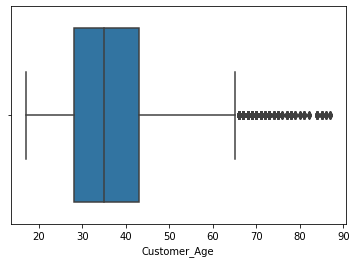

In [30]:
sns.boxplot(x=df["Customer_Age"])

### This values are our outliers for Customer_Age variable

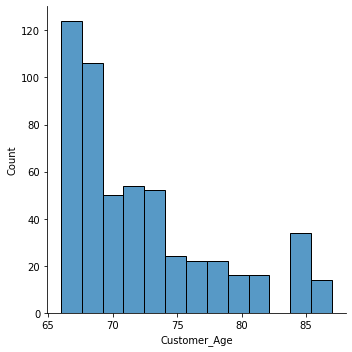

In [31]:
q3_age=df["Customer_Age"].quantile(.75)
q1_age=df["Customer_Age"].quantile(.25)
iqr_age=q3_age-q1_age
upper_age=q3_age+(1.5*iqr_age)
lower_age=q1_age-(1.5*iqr_age)
sns.displot(x=df[df["Customer_Age"]>=upper_age]["Customer_Age"],kind="hist");

### Looks like no outliers for Order_Quantity.

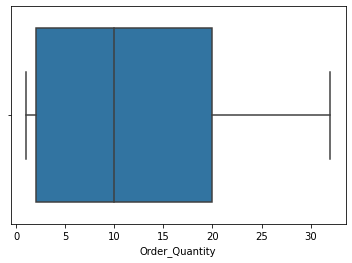

In [32]:
sns.boxplot(x=df["Order_Quantity"]);

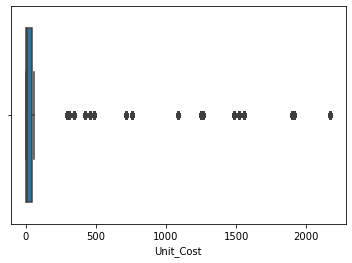

In [33]:
sns.boxplot(x=df["Unit_Cost"]);

### Unit_Cost's outliers.

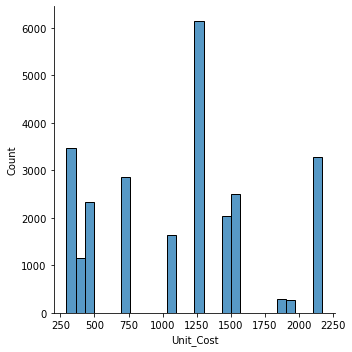

In [34]:
q3_uc=df["Unit_Cost"].quantile(.75)
q1_uc=df["Unit_Cost"].quantile(.25)
iqr_uc=q3_uc-q1_uc
upper_uc=q3_uc+(1.5*iqr_uc)
lower_uc=q1_uc-(1.5*iqr_uc)
sns.displot(x=df[df["Unit_Cost"]>=upper_uc]["Unit_Cost"],kind="hist");

### As you see there is too much outliers for each variable. If you want to drop that it's easy. For an example;
#### df[~(df["Unit_Price"]>=upper_up)] will drop outliers for Unit_Price variable. But then? Like I said need business knowledge and need knowledge about dataset.

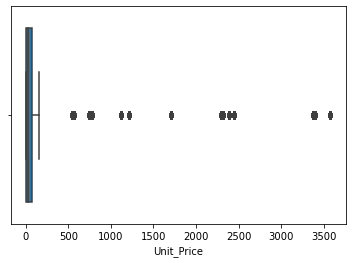

In [35]:
sns.boxplot(x=df["Unit_Price"]);

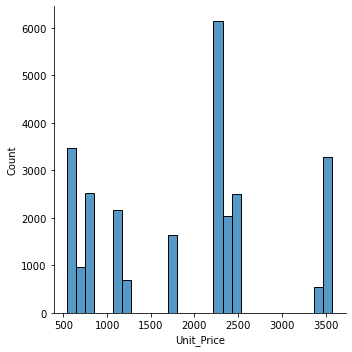

In [36]:
q3_up=df["Unit_Price"].quantile(.75)
q1_up=df["Unit_Price"].quantile(.25)
iqr_up=q3_up-q1_up
upper_up=q3_up+(1.5*iqr_up)
lower_up=q1_up-(1.5*iqr_up)
sns.displot(x=df[df["Unit_Price"]>=upper_up]["Unit_Price"],kind="hist");

### Same steps for other 3 variable (Profit, Cost, Revenue).

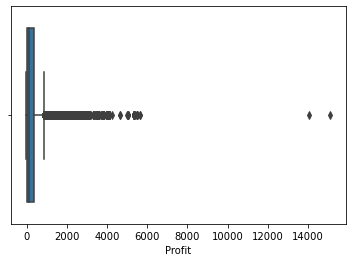

In [37]:
sns.boxplot(x=df["Profit"]);

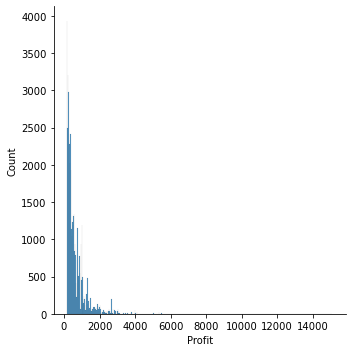

In [38]:
q3_profit=df["Profit"].quantile(.75)
q1_profit=df["Profit"].quantile(.25)
iqr_up=q3_profit-q1_profit
upper_profit=q3_profit+(1.5*iqr_up)
lower_profit=q1_profit-(1.5*iqr_up)
sns.displot(x=df[df["Profit"]>=upper_up]["Profit"],kind="hist");

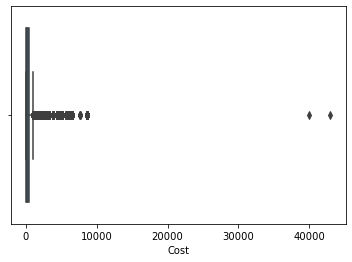

In [39]:
sns.boxplot(x=df["Cost"]);

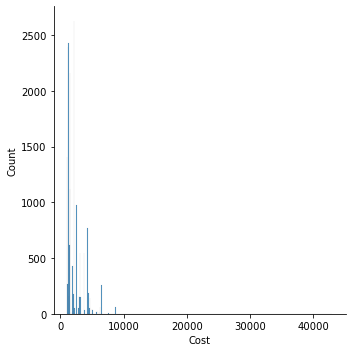

In [40]:
q3_cost=df["Cost"].quantile(.75)
q1_cost=df["Cost"].quantile(.25)
iqr_up=q3_cost-q1_cost
upper_cost=q3_cost+(1.5*iqr_up)
lower_cost=q1_cost-(1.5*iqr_up)
sns.displot(x=df[df["Cost"]>=upper_cost]["Cost"],kind="hist");

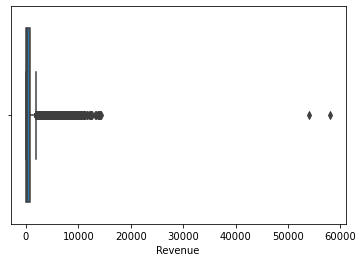

In [41]:
sns.boxplot(x=df["Revenue"]);

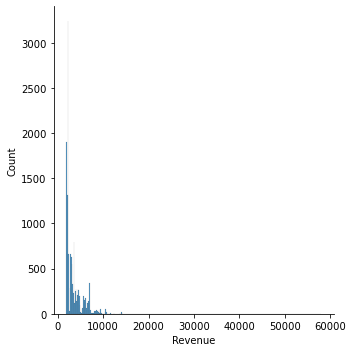

In [42]:
q3_revenue=df["Revenue"].quantile(.75)
q1_revenue=df["Revenue"].quantile(.25)
iqr_up=q3_revenue-q1_revenue
upper_revenue=q3_revenue+(1.5*iqr_up)
lower_revenue=q1_revenue-(1.5*iqr_up)
sns.displot(x=df[df["Revenue"]>=upper_revenue]["Revenue"],kind="hist");

### Let's drop duplicated values.

In [43]:
df.duplicated().sum()

1000

In [44]:
df[df.duplicated()].shape

(1000, 18)

In [45]:
df.shape,df[~(df.duplicated())].shape

((113003, 18), (112003, 18))

In [46]:
df=df[~(df.duplicated())]

### We checked null-nan values, inappropriate dtypes, duplicates and outliers.

### From now our EDA parts starts. We gonna visualize our data for making inferences, correlation etc..

In [47]:
df.corr()

,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Customer_Age,1.000000,0.027458,-0.021394,-0.020294,0.004455,-0.015980,-0.009259
Order_Quantity,0.027458,1.000000,-0.516379,-0.516471,-0.239031,-0.340512,-0.313050
Unit_Cost,-0.021394,-0.516379,1.000000,0.997892,0.740910,0.829589,0.817642
Unit_Price,-0.020294,-0.516471,0.997892,1.000000,0.749728,0.825994,0.818268
Profit,0.004455,-0.239031,0.740910,0.749728,1.000000,0.902246,0.956564
Cost,-0.015980,-0.340512,0.829589,0.825994,0.902246,1.000000,0.988767
Revenue,-0.009259,-0.313050,0.817642,0.818268,0.956564,0.988767,1.000000


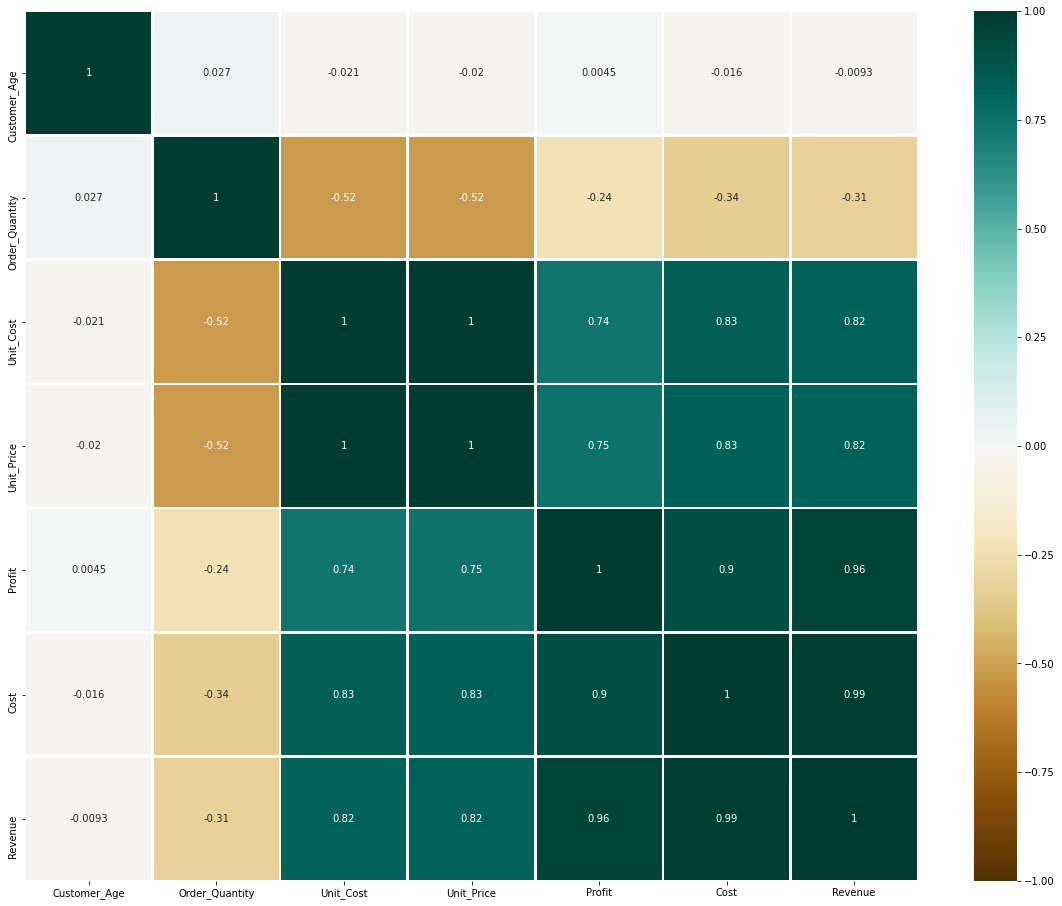

In [48]:
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(),annot=True,linewidths=1.5,vmax=1,vmin=-1,cmap="BrBG")
plt.show()

### Features Correlating with Profit

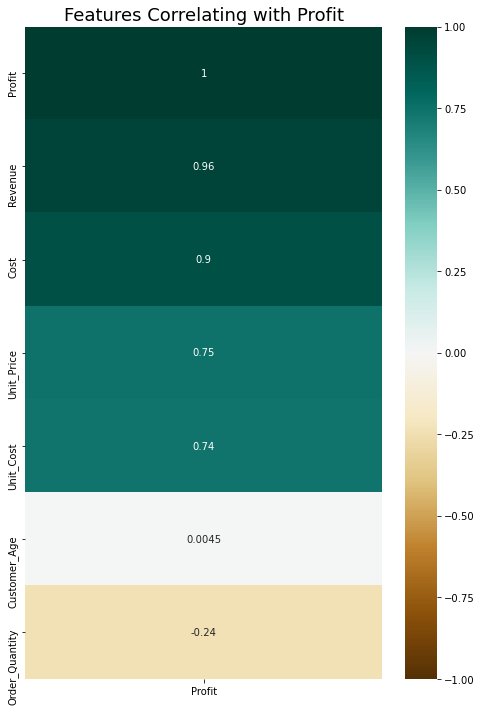

In [49]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[["Profit"]].sort_values(by="Profit", ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title("Features Correlating with Profit", fontdict={"fontsize":18});

In [50]:
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23.0,45.0,120.0,1366.0,1035.0,2401.0
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20.0,45.0,120.0,1188.0,900.0,2088.0
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4.0,45.0,120.0,238.0,180.0,418.0


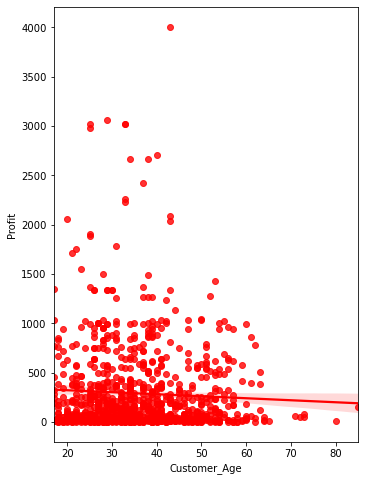

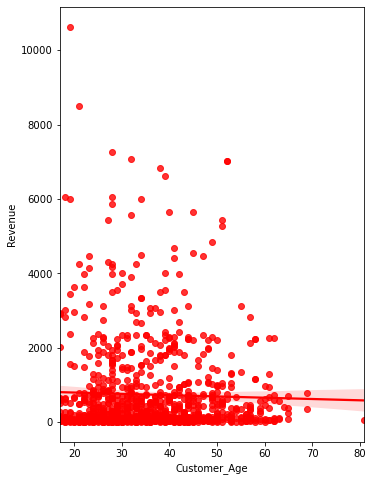

In [51]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.regplot(x="Customer_Age",y="Profit",data=df.sample(1000),color="Red")
plt.figure(figsize=(12,8))
plt.subplot(1,2,2)
sns.regplot(x="Customer_Age",y="Revenue",data=df.sample(1000),color="Red")
plt.show()

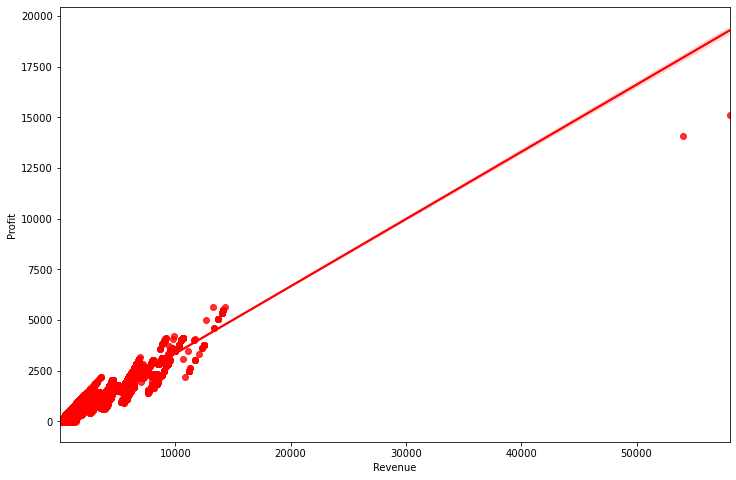

In [52]:
plt.figure(figsize=(12,8))
sns.regplot(x="Revenue",y="Profit",data=df,color="Red")
plt.show()

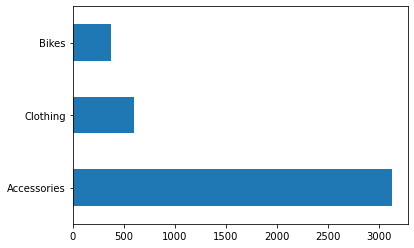

In [53]:
df[(df["Year"]==2016) & (df["Age_Group"]=="Youth (<25)")]["Product_Category"].value_counts(ascending=False).plot(kind="barh")
plt.show()

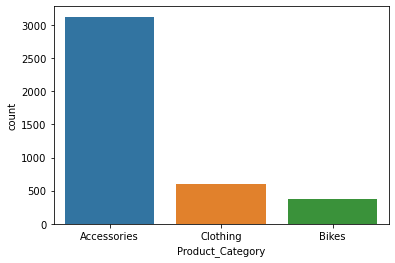

In [54]:
sns.countplot(x=df[(df["Year"]==2016) & (df["Age_Group"]=="Youth (<25)")]["Product_Category"])
plt.show()

In [55]:
pd.pivot_table(df,values="Cost",columns="Product_Category",index=[df[df["Year"]==2016]["Year"],df[df["Age_Group"]=="Youth (<25)"]["Age_Group"]],aggfunc="count",fill_value=0)

,Product_Category,Accessories,Bikes,Clothing
Year,Age_Group,,,
2016,Youth (<25),3123,371,596


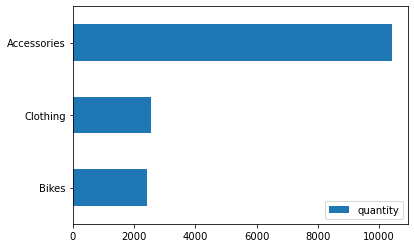

In [56]:
df[(df["Year"]==2016) & (df["Customer_Gender"]=="M")]["Product_Category"].value_counts(ascending=True).plot(kind="barh",label="quantity")
plt.legend()
plt.show()

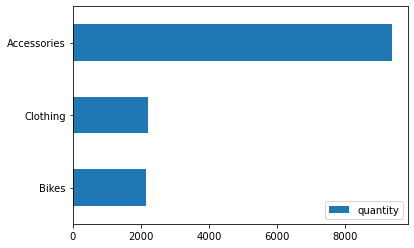

In [57]:
df[(df["Year"]==2016) & (df["Customer_Gender"]=="F")]["Product_Category"].value_counts(ascending=True).plot(kind="barh",label="quantity")
plt.legend()
plt.show()

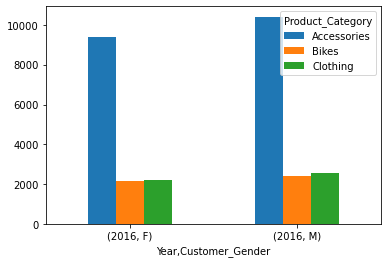

In [58]:
pd.pivot_table(df,values="Cost",columns="Product_Category",index=[df[(df["Year"]==2016)]["Year"],"Customer_Gender"],aggfunc="count").plot.bar()
plt.xticks(rotation=0)
plt.show()

In [59]:
pd.pivot_table(df,values="Cost",columns="Product_Category",index=[df[(df["Year"]==2016)]["Year"],"Customer_Gender"],aggfunc="count")

Product_Category      Accessories  Bikes  Clothing
Year Customer_Gender                              
2016 F                       9372   2155      2202
     M                      10409   2423      2557

In [60]:
pd.pivot_table(df[(df["Year"]==2016) & (df["Age_Group"]=="Youth (<25)")],values="Profit",index=["Country","Age_Group"],columns=["Product_Category"],aggfunc="sum")

,Product_Category,Accessories,Bikes,Clothing
Country,Age_Group,,,
Australia,Youth (<25),53601.0,88950.0,7100.0
Canada,Youth (<25),36550.0,1546.0,9265.0
France,Youth (<25),30916.0,29428.0,5490.0
Germany,Youth (<25),47256.0,58432.0,6296.0
United Kingdom,Youth (<25),38907.0,84037.0,11188.0
United States,Youth (<25),84827.0,37808.0,21460.0


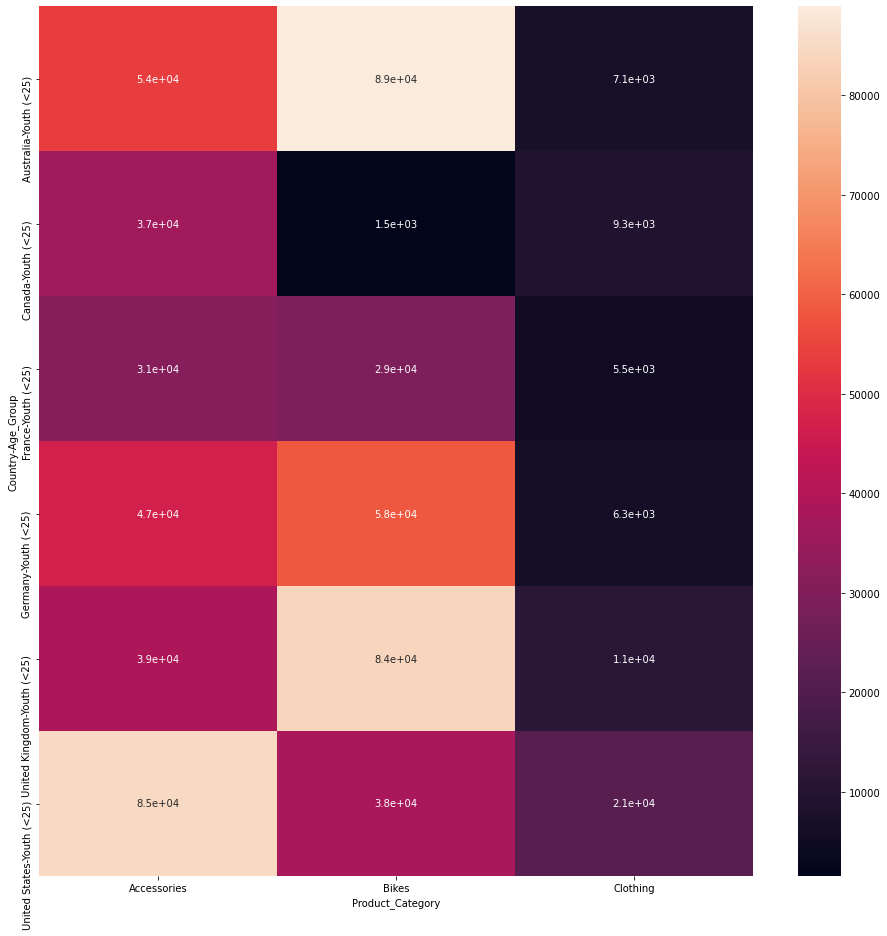

In [61]:
plt.figure(figsize=(16,16))
sns.heatmap(pd.pivot_table(df[(df["Year"]==2016) & (df["Age_Group"]=="Youth (<25)")],values="Profit",index=["Country","Age_Group"],columns=["Product_Category"],aggfunc="sum"),annot=True)
plt.show()

In [62]:
df[df["Year"]==2016].groupby(["Country","Age_Group"])["Profit"].sum()

Country         Age_Group           
Australia       Adults (35-64)           708698.0
                Seniors (64+)              1959.0
                Young Adults (25-34)     345558.0
                Youth (<25)              149651.0
Canada          Adults (35-64)           544584.0
                Seniors (64+)              7689.0
                Young Adults (25-34)     207046.0
                Youth (<25)               47361.0
France          Adults (35-64)           293777.0
                Seniors (64+)              2237.0
                Young Adults (25-34)     273798.0
                Youth (<25)               65834.0
Germany         Adults (35-64)           385481.0
                Seniors (64+)              6196.0
                Young Adults (25-34)     354490.0
                Youth (<25)              111984.0
United Kingdom  Adults (35-64)           571366.0
                Seniors (64+)              5425.0
                Young Adults (25-34)     392310.0
             

In [63]:
pd.pivot_table(df[df["Year"]==2016],values="Profit",index=["Year","Month"],columns="Product_Category",aggfunc="count")

Product_Category  Accessories  Bikes  Clothing
Year Month                                    
2016 April             3088.0  729.0     735.0
     February          2726.0  657.0     650.0
     January           2840.0  626.0     697.0
     July              1662.0    NaN     383.0
     June              3217.0  957.0     861.0
     March             2937.0  691.0     696.0
     May               3311.0  918.0     737.0

In [64]:
pd.pivot_table(df[df["Year"]==2016],values="Profit",index="Year",columns="Product_Category",aggfunc="sum")

Product_Category,Accessories,Bikes,Clothing
Year,,,
2016,2414046.0,3846541.0,736710.0


In [65]:
df[(df["Year"]==2016)&(df["Country"]=="United States")].groupby(["State"
                                                                 ,"Product_Category"])["Cost"].count()

State           Product_Category
Alabama         Accessories            1
California      Accessories         3922
                Bikes                854
                Clothing             967
Florida         Accessories            5
Georgia         Accessories            1
Illinois        Accessories            6
                Clothing               1
Kentucky        Accessories            4
Minnesota       Accessories            2
                Clothing               1
Mississippi     Accessories            1
                Clothing               1
New York        Accessories            7
                Clothing               1
Ohio            Accessories            3
                Clothing               2
Oregon          Accessories          957
                Bikes                170
                Clothing             266
South Carolina  Accessories            4
                Clothing               1
Texas           Accessories           10
                Bikes   

In [66]:
df[df["Year"]==2015].groupby("Product_Category")["Cost"].count()

Product_Category
Accessories    14837
Bikes           5679
Clothing        3706
Name: Cost, dtype: int64

In [67]:
df[df["Year"]==2016].groupby("Product_Category")["Cost"].count()

Product_Category
Accessories    19781
Bikes           4578
Clothing        4759
Name: Cost, dtype: int64

In [68]:
percent_num_of_sales=(df[df["Year"]==2016]["Product_Category"].count()/df[df["Year"]==2015]["Product_Category"].count()-1)*100

In [69]:
print("2015 num of sales:{}\n2016 num of sales:{}".format(df[df["Year"]==2015]["Product_Category"].count(),df[df["Year"]==2016]["Product_Category"].count()))
print("2016 sales raised by %{}".format(round(percent_num_of_sales,2)))

2015 num of sales:24222
2016 num of sales:29118
2016 sales raised by %20.21


In [70]:
df[df["Year"]==2015].groupby("Product_Category")["Profit"].sum()

Product_Category
Accessories    1912607.0
Bikes          4919518.0
Clothing        661980.0
Name: Profit, dtype: float64

In [71]:
df[df["Year"]==2015].groupby("Product_Category")["Profit"].sum().sum()

7494105.0

In [72]:
df[df["Year"]==2016].groupby("Product_Category")["Profit"].sum()

Product_Category
Accessories    2414046.0
Bikes          3846541.0
Clothing        736710.0
Name: Profit, dtype: float64

In [73]:
df[df["Year"]==2016].groupby("Product_Category")["Profit"].sum().sum()

6997297.0

In [74]:
percent_profit_of_sales=(1-df[df["Year"]==2016].groupby("Product_Category")["Profit"].sum().sum()/df[df["Year"]==2015].groupby("Product_Category")["Profit"].sum().sum())*100

In [75]:
print("2015 profit of sales:{}\n2016 profit of sales:{}".format(df[df["Year"]==2015].groupby("Product_Category")["Profit"].sum().sum(),df[df["Year"]==2016].groupby("Product_Category")["Profit"].sum().sum()))
print("2016 profit of sales decreased by %{}".format(round(percent_profit_of_sales,2)))

2015 profit of sales:7494105.0
2016 profit of sales:6997297.0
2016 profit of sales decreased by %6.63


### Our EDA (Explorarity Data Analysis) and Data Preprocessing steps ends here.
### And now we can go Tableau and we can make a dashboard. But before we go let's check our data.

In [76]:
df.isnull().sum().sum()

0

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112003 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              112003 non-null  datetime64[ns]
 1   Day               112003 non-null  object        
 2   Month             112003 non-null  object        
 3   Year              112003 non-null  object        
 4   Customer_Age      112003 non-null  int64         
 5   Age_Group         112003 non-null  object        
 6   Customer_Gender   112003 non-null  object        
 7   Country           112003 non-null  object        
 8   State             112003 non-null  object        
 9   Product_Category  112003 non-null  object        
 10  Sub_Category      112003 non-null  object        
 11  Product           112003 non-null  object        
 12  Order_Quantity    112003 non-null  float64       
 13  Unit_Cost         112003 non-null  float64       
 14  Unit

In [78]:
df.describe(exclude=["object"],datetime_is_numeric=True).T

,count,mean,min,25%,50%,75%,max,std
Date,112003,2014-11-23 05:03:07.484249600,2011-01-01 00:00:00,2013-12-22 00:00:00,2014-06-27 00:00:00,2016-01-09 00:00:00,2016-07-31 00:00:00,NaN
Customer_Age,112003,35.9192,17,28,35,43,87,11.0164
Order_Quantity,112003,11.9049,1,2,10,20,32,9.56538
Unit_Cost,112003,267.885,1,2,9,42,2171,550.286
Unit_Price,112003,453.949,2,5,25,70,3578,922.87
Profit,112003,285.936,-30,29,103,360,15096,454.808
Cost,112003,471.114,1,28,112,442,42978,887.084
Revenue,112003,757.051,2,64,225,806,58074,1312.17


In [79]:
# I dropped Date column for handle with an error.
df.drop("Date",axis=1).describe(exclude=["int64","float64"]).T

,count,unique,top,freq
Day,112003,31,24,4041
Month,112003,12,June,11121
Year,112003,6,2016,29118
Age_Group,112003,4,Adults (35-64),55338
Customer_Gender,112003,2,M,57800
Country,112003,6,United States,38825
State,112003,53,California,22208
Product_Category,112003,3,Accessories,69279
Sub_Category,112003,17,Tires and Tubes,33298
Product,112003,130,Water Bottle - 30 oz.,10641
